# 0. Start

import package & utils

In [25]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
import os
import myutils
import urx

Images

In [3]:
images_files = myutils.ls("src/")
images = [cv2.imread(img,1)[:,:,::-1] for img in images_files]

# 1. Kamera Kalibrierung

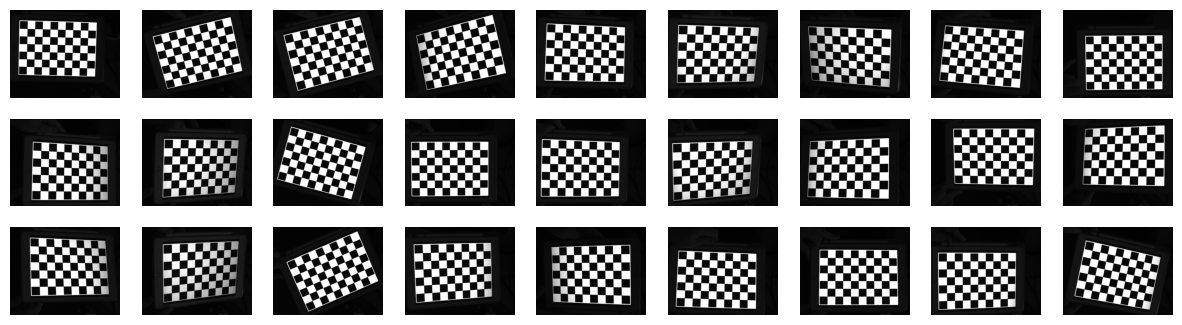

In [4]:
kalibrierung_files = myutils.ls("calibration/")
muster = [cv2.imread(img,1)[:,:,::-1] for img in kalibrierung_files]

fig=plt.figure(figsize=(15, 4))
for i in range (len(muster)):
    fig.add_subplot(3, 9, i+1)
    plt.imshow(muster[i], cmap = "gray")
    plt.axis('off')
plt.show()

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
w = 9   # 10 - 1
h = 6   # 7  - 1
objp = np.zeros((w*h,3), np.float32)
objp[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)
objp = objp*18.1  # 18.1 mm
objpoints = []
imgpoints = []
images_k = glob.glob(r'calibration/*.png')

i=0
for fname in images_k:
    img = cv2.imread(fname)
    h1, w1 = img.shape[0], img.shape[1]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    u, v = img.shape[:2]
    ret, corners = cv2.findChessboardCorners(gray, (w,h),None)
    if ret == True:
        # print("i:", i)
        i = i+1
        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (w,h), corners, ret)
        cv2.namedWindow('findCorners', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('findCorners', 640, 480)
        cv2.imshow('findCorners',img)
        cv2.waitKey(200)
cv2.destroyAllWindows()
# print('rechnen')
ret, mtx, dist, rvecs, tvecs = \
    cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# print("ret:",ret)
print("mtx:\n",mtx)
print("Verzerrung:\n",dist   )   # distortion cofficients = (k_1,k_2,p_1,p_2,k_3)
print("rvecs(i=0):\n",rvecs[0])
print("tvecs(i=0):\n",tvecs[0]) 
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (u, v), 0, (u, v))
print('newcameramtx',newcameramtx)

mtx:
 [[3.08572425e+03 0.00000000e+00 6.21399833e+02]
 [0.00000000e+00 3.08667037e+03 5.25161929e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Verzerrung:
 [[-1.62497586e-01 -6.85496159e-01  7.51415608e-04  5.35846204e-04
   2.68824360e+01]]
rvecs(i=0):
 [[ 0.05841109]
 [-0.03477005]
 [ 0.02600298]]
tvecs(i=0):
 [[-85.10820255]
 [-62.2917602 ]
 [626.76949323]]
newcameramtx [[3.08589233e+03 0.00000000e+00 6.19290723e+02]
 [0.00000000e+00 3.08514355e+03 5.27566226e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [6]:
def kali_n(n):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    w = 9   # 10 - 1
    h = 6   # 7  - 1
    objp = np.zeros((w*h,3), np.float32)
    objp[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)
    objp = objp*18.1  # 18.1 mm
    objpoints = []
    imgpoints = []
    images_k = glob.glob(r'kalibrierung/*.png')

    i=0
    for fname in images_k[:n]:
        img = cv2.imread(fname)
        h1, w1 = img.shape[0], img.shape[1]
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        u, v = img.shape[:2]
        ret, corners = cv2.findChessboardCorners(gray, (w,h),None)
        if ret == True:
            # print("i:", i)
            i = i+1
            cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            objpoints.append(objp)
            imgpoints.append(corners)
            cv2.drawChessboardCorners(img, (w,h), corners, ret)
            cv2.namedWindow('findCorners', cv2.WINDOW_NORMAL)
            cv2.resizeWindow('findCorners', 640, 480)
            cv2.imshow('findCorners',img)
            cv2.waitKey(200)
    cv2.destroyAllWindows()

    ret, mtx, dist, rvecs, tvecs = \
        cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (u, v), 0, (u, v))
    return dist[0], [newcameramtx[0][0], newcameramtx[1][1], newcameramtx[0][2], newcameramtx[1][2]]

In [7]:
def para_stu(n):
    x = []
    cam = []
    y = np.linspace(3,n,n-2)
    for i in range(3,n+1):
        tmp,tmp2 = kali_n(i)
        x.append(tmp)
        cam.append(tmp2)
    return x,y,cam

In [80]:
x,y,cam = para_stu(len(images_k))

In [108]:
x = np.array(x)
x_new = x[11:,:]
y_new = y[11:]
x_re = []
x_mean = np.mean(x_new,axis=0)
for i in range(len(y_new)):
    x_ae = np.abs(x_new[i,:] - x_mean)
    x_re.append(np.abs(x_ae / x_mean))
x_re = np.array(x_re)


In [125]:
cam = np.array(cam)
cam_new = cam[11:,:]
cam_re = []
cam_ae_list = []
cam_mean = np.mean(cam_new,axis=0)
for i in range(len(y_new)):
    cam_ae = np.abs(cam_new[i,:] - cam_mean)
    cam_ae_list.append(cam_ae)
    cam_re.append(np.abs(cam_ae / cam_mean))
cam_re = np.array(cam_re)
cam_ae_list = np.array(cam_ae_list)


Text(0.5, 1.0, 'focal length')

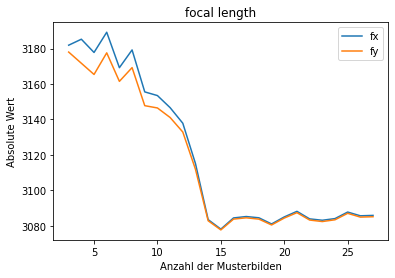

In [82]:
label = ['fx','fy']
plt.plot(y,cam[:,:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('focal length')

Text(0.5, 1.0, 'principal point')

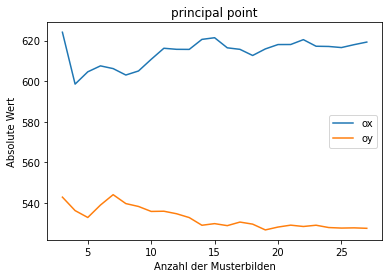

In [92]:
label = ['ox','oy']
plt.plot(y,cam[:,2:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('principal point')

Text(0.5, 1.0, 'Relativer Fehler für f(x,y)')

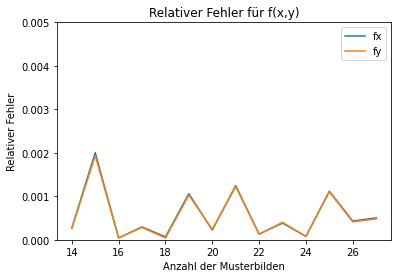

In [135]:
label = ['fx','fy']
plt.plot(y_new,cam_re[:,:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylim((0,0.005))
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler für f(x,y)')

Text(0.5, 1.0, 'Absoluter Fehler für o(x,y)')

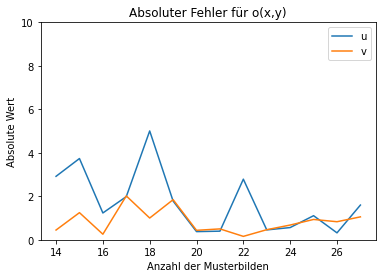

In [133]:
label = ['u','v']
plt.plot(y_new,cam_ae_list[:,2:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
plt.ylim((0,10))
# plt.yscale('log')
plt.title('Absoluter Fehler für o(x,y)')

Text(0.5, 1.0, 'Koeffizienten der Verzerrung')

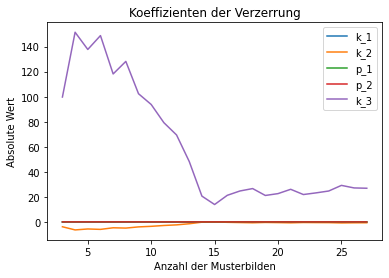

In [94]:
label = ['k_1','k_2','p_1','p_2','k_3']
plt.plot(y,x,label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('Koeffizienten der Verzerrung')

Text(0.5, 1.0, 'Koeffizienten der Verzerrung')

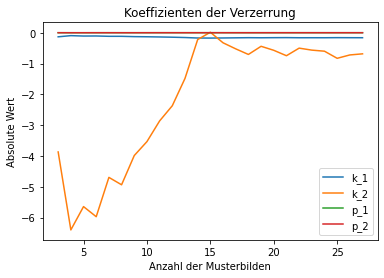

In [77]:
label = ['k_1','k_2','p_1','p_2']
plt.plot(y,x[:,:4],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('Koeffizienten der Verzerrung')

Text(0.5, 1.0, 'Relativer Fehler der Verzerrung')

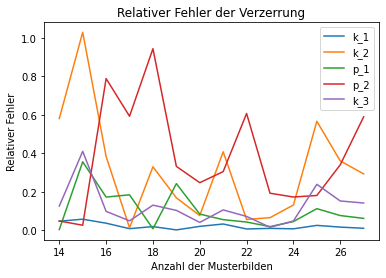

In [111]:
label = ['k_1','k_2','p_1','p_2','k_3']
plt.plot(y_new,x_re,label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Verzerrung')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_1')

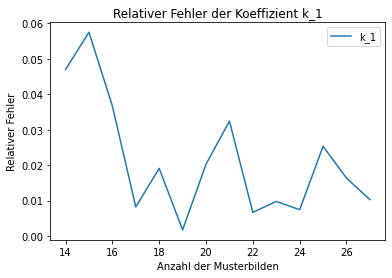

In [112]:
label = 'k_1'
plt.plot(y_new,x_re[:,0:1],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_1')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_2')

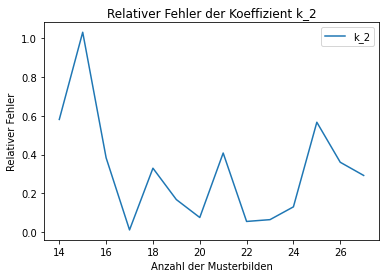

In [113]:
label = 'k_2'
plt.plot(y_new,x_re[:,1:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_2')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_3')

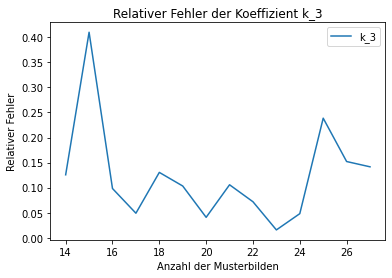

In [114]:
label = 'k_3'
plt.plot(y_new,x_re[:,4:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_3')

Verzerrung zurückgehen

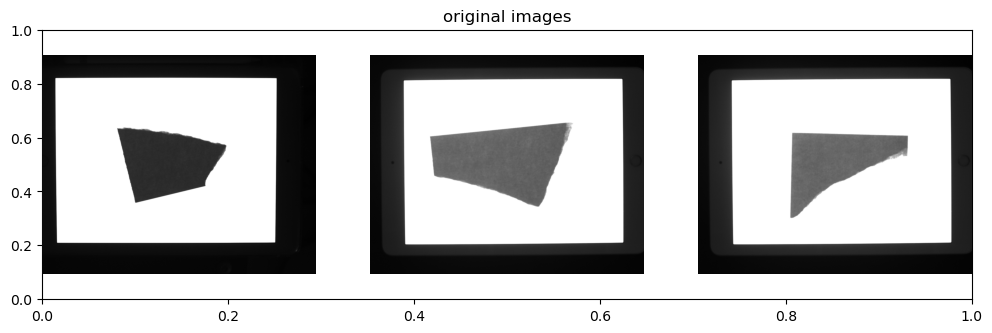

In [8]:
fig=plt.figure(figsize=(12, 3.5))
plt.title("original images")
for i in range (len(images)):
    fig.add_subplot(1, len(images), i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.axis('off')
plt.show()

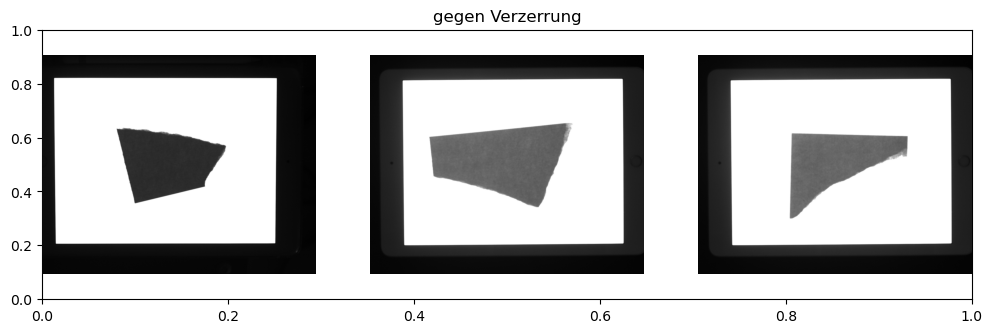

In [9]:
dst = []
for ele in images:
    tmp = cv2.undistort(ele, mtx, dist, None, newcameramtx)
    dst.append(tmp)


filter = 4
scale = 4
#iPad
wp=198*scale
hp =148*scale
#Pad
Pad = 10

fig=plt.figure(figsize=(12, 3.5))
plt.title("gegen Verzerrung")
for i in range (len(dst)):
    fig.add_subplot(1, len(dst), i+1)
    plt.imshow(dst[i], cmap = "gray")
    plt.axis('off')
plt.show()

# 2. Bildenverarbeitung

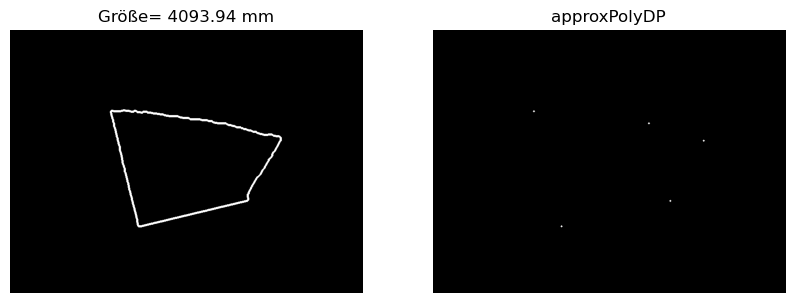

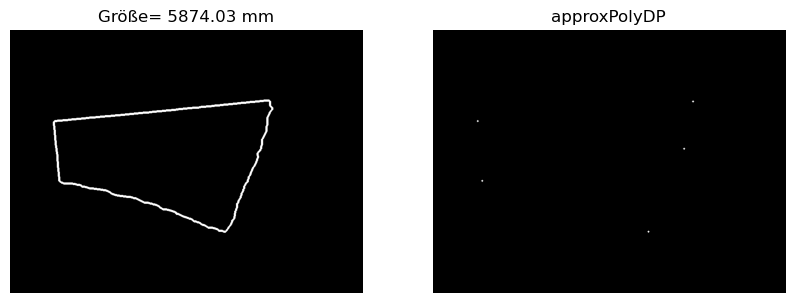

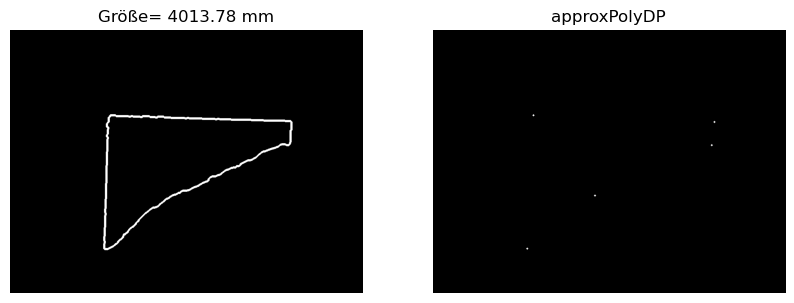

In [13]:
def multipleKontour(list):
    con_list = []
    for i in range(len(list)):

        c_img = myutils.vorbe(list[i])
        imgcon, cons, maxArea = myutils.boundingRect(c_img, filter)
        maxbox = cons[0][2]
        myutils.reorder(maxbox)
        w_img = myutils.warpImg(list[i], maxbox, wp, hp, Pad)
        pad_img = cv2.copyMakeBorder(w_img, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
        
        w1_img = cv2.medianBlur(pad_img,5)
        w2_img = cv2.bilateralFilter(w1_img, d = 50, sigmaColor= 10, sigmaSpace= 50)

        k2_img = myutils.kmeans(w2_img, 3)

        c2_img = cv2.Canny(k2_img,100,110)
        kernel = np.ones((5,5))
        c2_img = cv2.dilate(c2_img,kernel,iterations=2) #dilatieren
        c2_img = cv2.erode(c2_img,kernel,iterations=1) #erodieren
        fig=plt.figure(figsize=(10, 10))
        fig.add_subplot(1, 2, 1)
        con = myutils.print_inner_cons(c2_img, 1000, scale)
        fig.add_subplot(1, 2, 2)
        con2 = myutils.print_approx_cons(c2_img, 1000, scale)
        con_list.append(con2)
        plt.show()

    return con_list

con_list = multipleKontour(dst)

In [43]:
con = con_list[0]
# print(con)
con = [(ele[0]+Pad)/scale/1000 for ele in con]
print(con)

[array([0.059 , 0.0485]), array([0.1235 , 0.05525]), array([0.15425, 0.065  ]), array([0.1355 , 0.09875]), array([0.0745, 0.113 ])]


# 3. Bahnplannung

Robot verbinden

In [44]:
rob = urx.Robot("192.168.0.100", use_rt=True)
rob.urFirm = 5.9 # 或您的实际固件版本
rob.set_tcp((0, 0, 0.08, 0, 0, 0))
rob.set_payload(2, (0, 0, 0.1))
rob.set_gravity((0, 0, 9.81))
pi = np.pi

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1420
Exception in thread Thread-24:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 402, in run
    self.__recv_rt_data()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 286, in __recv_rt_data
    if self.urFirm >= 3.1:
TypeError: '>=' not supported between instances of 'NoneType' and 'float'


In [45]:
def rob_init():
    tmpj = rob.getj()
    tmp1 = tmpj[0]
    tmp5 = tmpj[5]
    tmpj = (np.array(tmpj) //10 + 0.5) * pi
    
    tmpj[0] = tmp1
    tmpj[5] = tmp5
    return tmpj

In [53]:
initj = rob_init()
print(rob.getj())
print(initj)
rob.movej(initj, 0.1, 0.05)


[-2.8611822764026087, -1.5707600752459925, 1.5706663131713867, -1.5707481543170374, -1.5708406607257288, 4.502089023590088]
[-2.86118228 -1.57079633  1.57079633 -1.57079633 -1.57079633  4.50208902]


[-2.8611941973315638,
 -1.5707123915301722,
 1.5707621574401855,
 -1.5707123915301722,
 -1.5708888212787073,
 4.502041816711426]

In [73]:
pose = rob.getl()
rx, ry, rz = pose[3:]
x_b, y_b = pose[:2]
# define target pose
target_pose = [0.380, 0.240, 0.3, rx, ry, rz]  # [x, y, z, rx, ry, rz]
# 
rob.movel(target_pose, acc=0.1, vel=0.1)  #

<Transform:
<Orientation: 
array([[ 8.81890157e-01,  4.71454868e-01, -2.41607028e-04],
       [ 4.71454772e-01, -8.81890165e-01, -3.66168741e-04],
       [-3.85702897e-04,  2.09013822e-04, -9.99999904e-01]])>
<Vector: (0.38000, 0.23996, 0.30000)>
>

In [70]:
def pad(rx, ry, rz, wp, hp, scale):
    tmp = rob.getl()
    x = tmp[0]
    y = tmp[1]
    z = tmp[2]
    w = wp/scale/1000
    h = hp/scale/1000
    for i in range(2):
        rob.movel([x, y, z, rx, ry, rz], 0.04, 0.02)
        rob.movel([x-w, y, z, rx, ry, rz], 0.04, 0.02)
        rob.movel([x-w, y+h, z, rx, ry, rz], 0.04, 0.02)
        rob.movel([x, y+h, z, rx, ry, rz], 0.04, 0.02)
    rob.movel([x, y, z, rx, ry, rz], 0.04, 0.02)
    
    return [x,y,z]

pad(rx, ry, rz, wp, hp, scale)


[0.3799651411245466, 0.24001305086102442, 0.29999326074983795]

[-2.861242119465963,
 -1.5708683172809046,
 1.5709056854248047,
 -1.570904556904928,
 -1.5707925001727503,
 4.5022807121276855]

In [40]:
for i in range(8):
    rob.movel([x_b-(i+1)/50, y_b, 0.3, rx, ry, rz], 0.04, 0.02)

In [74]:
w = wp/scale/1000
h = hp/scale/1000

# k2m = (tvecs[0][0][0]/100,tvecs[0][1][0]/100,tvecs[0][2][0]/100)
# print(k2m)

# laser
b2m = (x_b, y_b) # x,y
# print(b2m)

m2img = ((0,1),(1,0))
# x_m = y_img
# y_m = x_img 

print(con)
con_new = [[x_b-w+ele[0], y_b+h-ele[1]] for ele in con]
print(con_new)

[array([0.059 , 0.0485]), array([0.1235 , 0.05525]), array([0.15425, 0.065  ]), array([0.1355 , 0.09875]), array([0.0745, 0.113 ])]
[[0.21100705063870523, 0.299479527138097], [0.27550705063870523, 0.29272952713809697], [0.30625705063870523, 0.282979527138097], [0.28750705063870524, 0.24922952713809698], [0.22650705063870524, 0.234979527138097]]


In [77]:
for i in range(len(con_new)):
    rob.movel([con_new[i][0], con_new[i][1], 0.3, rx, ry, rz], 0.02, 0.02)
    print ('%i ist fertig' %i)
rob.movel([con_new[0][0], con_new[0][1], 0.3, rx, ry, rz], 0.02, 0.02)
print ('fertig')

0 ist fertig
1 ist fertig
2 ist fertig
3 ist fertig
4 ist fertig
fertig


Robot not running: {'size': 47, 'type': 0, 'timestamp': 12426960000, 'isRobotConnected': True, 'isRealRobotEnabled': True, 'isPowerOnRobot': False, 'isEmergencyStopped': True, 'isSecurityStopped': True, 'isProgramRunning': False, 'isProgramPaused': True, 'robotMode': 3, 'controlMode': 0, 'speedFraction': 1.0, 'speedScaling': 0.0, 'speedFractionLimit': b'?'}
Robot not running: {'size': 47, 'type': 0, 'timestamp': 12426960000, 'isRobotConnected': True, 'isRealRobotEnabled': True, 'isPowerOnRobot': False, 'isEmergencyStopped': True, 'isSecurityStopped': True, 'isProgramRunning': False, 'isProgramPaused': True, 'robotMode': 3, 'controlMode': 0, 'speedFraction': 1.0, 'speedScaling': 0.0, 'speedFractionLimit': b'?'}
Robot not running: {'size': 47, 'type': 0, 'timestamp': 12426960000, 'isRobotConnected': True, 'isRealRobotEnabled': True, 'isPowerOnRobot': False, 'isEmergencyStopped': True, 'isSecurityStopped': True, 'isProgramRunning': False, 'isProgramPaused': True, 'robotMode': 3, 'controlM

In [203]:
index = 10
rob.movel([con_new[index][0], con_new[index][1], 0.3, rx, ry, rz], 0.02, 0.02)
#F1 0 1mm 5 2.5mm 7 2.5mm 8 3mm
#F2 0 1mm 7 1.5mm 14 3.5mm 16 5mm
#F3 0 3mm 2 1mm 3 5mm 4 5mm 10 3.5mm

<Transform:
<Orientation: 
array([[-6.89503254e-01,  7.24282584e-01,  3.47683195e-05],
       [ 7.24282584e-01,  6.89503255e-01, -1.65579365e-05],
       [-3.59654945e-05,  1.37653372e-05, -9.99999999e-01]])>
<Vector: (0.31405, 0.32362, 0.30001)>
>